## Task 3: Method Chaining and Python Programs¶
#### Step 3: Move your function into a new .py file: (completed, but can't import this function (see below))

In [1]:
import scripts.project_functions
df = project_functions.load_and_process(r"""C:\Users\palmi\data301\data301_project\course-project-solo_319\data\raw\african_crises.csv""")
df

NameError: name 'null' is not defined

In [2]:
from scripts import project_functions

NameError: name 'null' is not defined

In [3]:
# As you can see, I had difficulty importing from project_functions.
# I saw that a lot of others on Piazza had the same issue, so hopefully this won't hurt my mark!
# I'll just use the function directly to get my data.

---

## Task 4: Conduct an Exploratory Data Analysis (EDA) on your dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid',font_scale=1.2)
sns.set_palette('RdBu')

In [2]:
def load_and_process(path):
    
    # Method Chain 1 (for cleaning data and dropping columns):
    
    df = (   
    pd.read_csv(path)
    .drop(['case', 'cc3', 'gdp_weighted_default', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis'], axis=1)
    .dropna()
    .reset_index(drop=True)
    )
    
    # Method Chain 2 (for dropping rows and resetting index):
    
    df1 = (
    df[df.year >= 2000]
    .reset_index(drop=True)
    )
    
    return df1

In [3]:
df = load_and_process(r"""C:\Users\palmi\data301\data301_project\course-project-solo_319\data\raw\african_crises.csv""")
df

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,inflation_annual_cpi
0,Algeria,2000,0,75.3428,0,0,0.300
1,Algeria,2001,0,77.8196,0,0,4.200
2,Algeria,2002,0,79.7234,0,0,1.430
3,Algeria,2003,0,72.6128,0,0,4.259
4,Algeria,2004,0,72.6137,0,0,3.972
...,...,...,...,...,...,...,...
188,Zimbabwe,2009,1,354.8000,1,1,-7.670
189,Zimbabwe,2010,0,378.2000,1,1,3.217
190,Zimbabwe,2011,0,361.9000,1,1,4.920
191,Zimbabwe,2012,0,361.9000,1,1,3.720


In [4]:
df.shape

(193, 7)

In [5]:
df.head()

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,inflation_annual_cpi
0,Algeria,2000,0,75.3428,0,0,0.300
1,Algeria,2001,0,77.8196,0,0,4.200
2,Algeria,2002,0,79.7234,0,0,1.430
3,Algeria,2003,0,72.6128,0,0,4.259
4,Algeria,2004,0,72.6137,0,0,3.972


In [6]:
df.columns

Index(['country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'inflation_annual_cpi'],
      dtype='object')

In [7]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
year,193.0,2006.927461,4.294488e+00,2000.00,2003.000,2007.000,2011.000000,2.014000e+03
systemic_crisis,193.0,0.082902,2.764505e-01,0.00,0.000,0.000,0.000000,1.000000e+00
exch_usd,193.0,83.978768,1.491018e+02,0.00,4.500,11.560,80.751944,7.443061e+02
domestic_debt_in_default,193.0,0.088083,2.841525e-01,0.00,0.000,0.000,0.000000,1.000000e+00
sovereign_external_debt_default,193.0,0.253886,4.363651e-01,0.00,0.000,0.000,1.000000,1.000000e+00
inflation_annual_cpi,193.0,114304.782972,1.582833e+06,-7.67,3.202,5.654,10.655000,2.198970e+07


In [8]:
df.describe(exclude=np.number).T

,count,unique,top,freq
country,193,13,Kenya,15


In [12]:
import pandas_profiling

from pandas_profiling import ProfileReport
prof = ProfileReport(df, title = 'African Economic Data Profile Report')
prof.to_file(output_file='output.html')

prof

<AxesSubplot:>

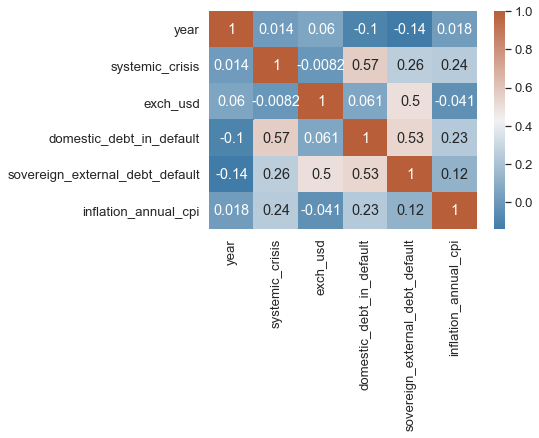

In [9]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(240, 25, as_cmap=True))

##### It is interesting (though perhaps not surprising) to see that financial crises, including debt defaults and systemic crises, are moderately correlated with eachother. It is also interesting to see that the correlation between exchange rates and external debt defaults is moderate, but that the correlation between exchange rates and domestic debt defaults is almost 0. Perhaps this is because poorly managed governments sometimes print money to in an attempt to settle external debt obligations. 

In [10]:
df1 = df.groupby('country', as_index=False)['inflation_annual_cpi'].mean().sort_values('inflation_annual_cpi',ascending = False)
df1.reset_index(drop=True)

,country,inflation_annual_cpi
0,Zimbabwe,1.575639e+06
1,Angola,5.716247e+01
2,Zambia,1.409500e+01
3,Nigeria,1.177760e+01
4,Egypt,7.797600e+00
5,Kenya,7.759000e+00
6,South Africa,5.853500e+00
7,Mauritius,5.456933e+00
8,Central African Republic,4.096400e+00
9,Algeria,3.710200e+00


##### It's interesting to see how high Zimbabwe's average annual inflation rate is. Zimbabwe has suffered from hyperinflation in recent years, but the magnitude of the difference between Zimbabwe's inflation and the inflation of other countries is suprising. It may be difficult to come up with an effective visualization given the magnitude of this difference.

In [11]:
df2 =  df.groupby('country', as_index=False)['exch_usd'].mean().sort_values('exch_usd',ascending = False)
df2.reset_index(drop=True)

,country,exch_usd
0,Central African Republic,534.201658
1,Nigeria,136.652013
2,Zimbabwe,129.907286
3,Kenya,78.176130
4,Angola,77.061844
5,Algeria,75.241047
6,Mauritius,29.942199
7,Morocco,8.868580
8,South Africa,7.940036
9,Egypt,5.672593


Text(0.5, 1.0, 'Country by Exchange Rate (relative to USD)')

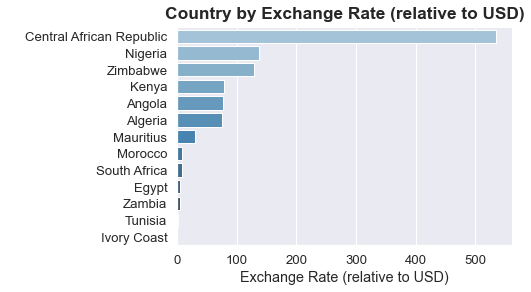

In [17]:
sns.barplot(x="exch_usd", y="country", data=df2, palette='Blues_d')
sns.despine()
plt.ylabel(' ')
plt.xlabel('Exchange Rate (relative to USD)')
plt.title('Country by Exchange Rate (relative to USD)', fontsize='large', va='bottom', fontweight='bold')

##### A currency's exchange rate (relative to the US Dollar) is inversely related with its strength; the Central African Republic has the weakest currency, while the Ivory Coast has the strongest. 

Text(0.5, 1.0, 'Countries by External Debt Default Since 2000 (Where 1 = Default)')

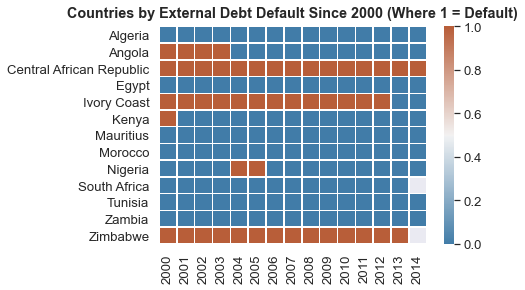

In [18]:
df3 = df.pivot("country", "year", "sovereign_external_debt_default")
sns.heatmap(df3, vmin=0, vmax=1, linewidths=0.5, cmap=sns.diverging_palette(240, 25, as_cmap=True))
plt.ylabel('')
plt.xlabel('')
plt.title('Countries by External Debt Default Since 2000 (Where 1 = Default)', fontsize='medium', va='bottom', fontweight='bold')

##### Note that in the above heatmap, external debt defaults tend to last for many consecutive years. This suggests that it is rare for a country to get its public finances in order right after a default. 

---

## Task 5. Conduct your analysis to help answer your research question(s):

### **Research Question 1:** Which African countries defaulted on domestic and/or external debt between 2000 and 2014?

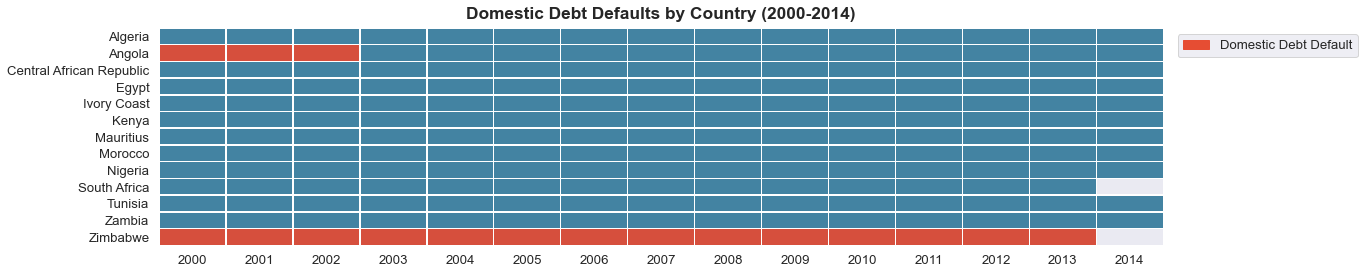

In [77]:
import matplotlib.patches as mpatches
df3 = df.pivot("country", "year", "domestic_debt_in_default")
sns.heatmap(df3, vmin=0, vmax=1, linewidths=0.5, cbar=False, cmap=sns.diverging_palette(230, 16, l=52, center="dark", as_cmap=True))
plt.ylabel('')
plt.xlabel('')
plt.title('Domestic Debt Defaults by Country (2000-2014)', fontsize='large', fontweight='bold', va='bottom')
red_patch = mpatches.Patch(color=[0.9,0.3,0.2], label='Domestic Debt Default')
plt.legend(bbox_to_anchor=(1.20, 1),handles=[red_patch])

##### Fig. 1: Angola and Zimbabwe are the only countries to have defaulted on domestic debt between 2000 and 2014.

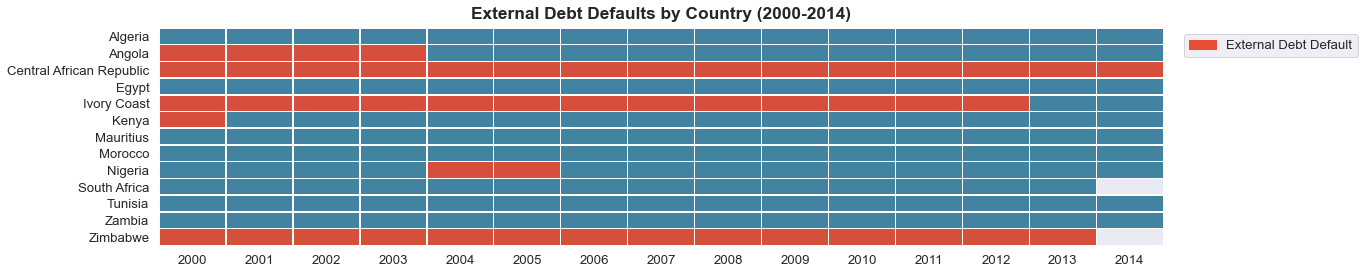

In [71]:
df3 = df.pivot("country", "year", "sovereign_external_debt_default")
sns.heatmap(df3, vmin=0, vmax=1, linewidths=0.5, cbar=False, cmap=sns.diverging_palette(230, 16, l=52, center="dark", as_cmap=True))
plt.ylabel('')
plt.xlabel('')
plt.title('External Debt Defaults by Country (2000-2014)', fontsize='large', fontweight='bold', va='bottom')
red_patch = mpatches.Patch(color=[0.9,0.3,0.2], label='External Debt Default')
plt.legend(bbox_to_anchor=(1.2, 1),handles=[red_patch])

##### Fig. 2: It is clear that external debt defaults are more common than domestic debt defaults. From 2000 to 2014, Angola, the Central African Republic, the Ivory Coast, Kenya, Nigera, and Zimbabwe each defaulted on external debt at least once.

### **Research Question 2:** Which country had the most external debt defaults? Which had the most domestic debt defaults?

Text(0.5, 1.0, 'Number of External Debt Defaults by Country (2000-2014)')

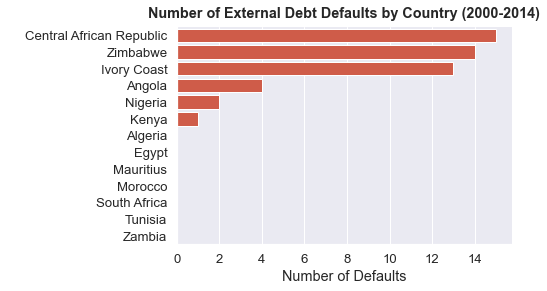

In [11]:
df4 = df.groupby('country', as_index=False)[['domestic_debt_in_default','sovereign_external_debt_default']].agg(lambda x: sum(x)).sort_values(['domestic_debt_in_default','sovereign_external_debt_default'],ascending = False)
df4

sns.barplot(x="sovereign_external_debt_default", y="country",
            order=['Central African Republic', 'Zimbabwe', 'Ivory Coast', 'Angola', 'Nigeria', 'Kenya', 'Algeria', 'Egypt', 'Mauritius', 'Morocco', 'South Africa', 'Tunisia', 'Zambia'],
            data=df4, color=[0.9,0.3,0.2])
sns.despine()
plt.ylabel(' ')
plt.xlabel('Number of Defaults')
plt.title('Number of External Debt Defaults by Country (2000-2014)', fontsize='medium', va='bottom', fontweight='bold')

##### Fig. 3: The Central African Republic had the most external debt defaults at 15. 

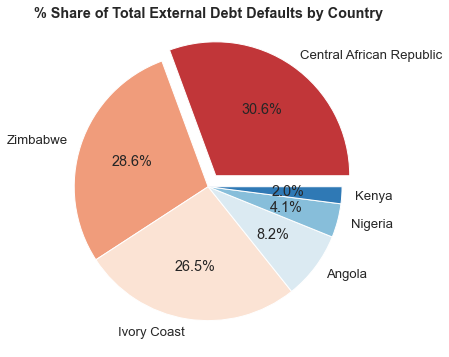

In [62]:
sizes=[15, 14, 13, 4, 2, 1]
labels=['Central African Republic', 'Zimbabwe', 'Ivory Coast', 'Angola', 'Nigeria', 'Kenya']

fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.pie(sizes, labels=labels, explode=[0.1, 0, 0, 0, 0, 0], pctdistance=0.6, autopct='%1.1f%%')
plt.title('% Share of Total External Debt Defaults by Country', fontweight='bold')
plt.show()

##### Fig. 4: The Central African Republic experienced the most external debt defaults, accounting for 15 defaults out of a total of 49 (30.6%).

Text(0.5, 1.0, 'Number of Domestic Debt Defaults by Country (2000-2014)')

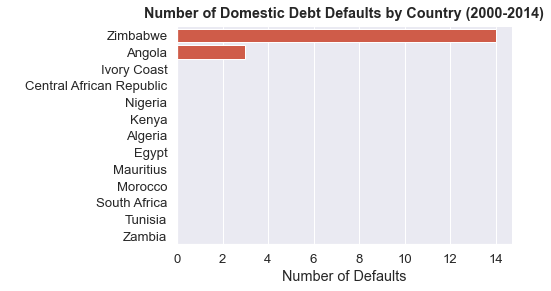

In [88]:
sns.barplot(x="domestic_debt_in_default", y="country",  order=['Zimbabwe', 'Angola', 'Ivory Coast', 'Central African Republic', 'Nigeria', 'Kenya', 'Algeria', 'Egypt', 'Mauritius', 'Morocco', 'South Africa', 'Tunisia', 'Zambia'], data=df4, color=[0.9, 0.3, 0.2])
sns.despine()
plt.ylabel(' ')
plt.xlabel('Number of Defaults')
plt.title('Number of Domestic Debt Defaults by Country (2000-2014)', fontsize='medium', va='bottom', fontweight='bold')

##### Fig. 5: Zimbabwe had the most domestic debt defaults at 14. 

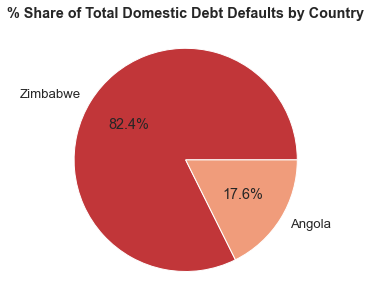

In [66]:
sizes=[14, 3]
labels=['Zimbabwe', 'Angola']

fig = plt.figure(1, figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.pie(sizes, labels=labels, pctdistance=0.6, autopct='%1.1f%%')
plt.title('% Share of Total Domestic Debt Defaults by Country', fontweight='bold')
plt.show()

##### Fig. 6: Zimbabwe experienced the most domestic debt defaults by far, accounting for 14 defaults out of a total of 17 (82.4%). 

### **Research Question 3:** How has inflation in these countries trended over time? Which country had the highest inflation?

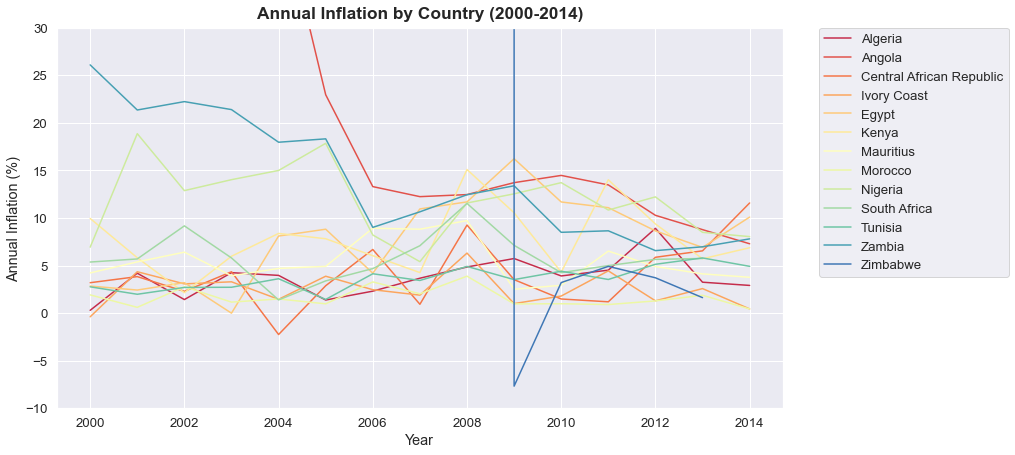

In [58]:
plt.figure(figsize=(13,7))
sns.lineplot(data=df, x='year', y='inflation_annual_cpi', hue='country', palette='Spectral')
plt.ylabel('Annual Inflation (%)')
plt.ylim(-10, 30)
plt.xlabel('Year')
plt.title('Annual Inflation by Country (2000-2014)', fontsize='large', va='bottom', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Fig. 7: Generally speaking, inflation in these countries has been very volatile over time. For context, a typical inflation rate for OECD countries is around 2%, but there are many instances of inflation rates climbing above 5% for these 13 African countries. In fact, Zimbabwe and Angola's inflation rates have been so extreme that they cannot be captured by the y-axis maximum of 30%. To determine which of Zimbabwe and Angola had the higher inflation rate, I created another line plot: 

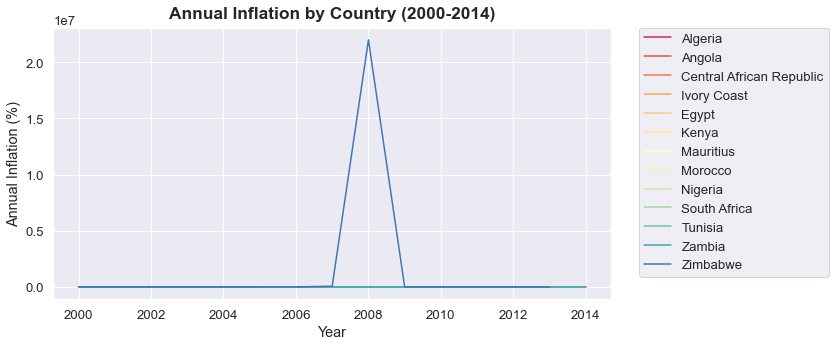

In [82]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='year', y='inflation_annual_cpi', hue='country', palette='Spectral')
plt.ylabel('Annual Inflation (%)')
plt.xlabel('Year')
plt.title('Annual Inflation by Country (2000-2014)', fontsize='large', va='bottom', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Fig 8: Zimbabwe clearly had the highest inflation rate, with annual inflation reaching nearly 1e7, or 10,000,000% in 2008. This makes sense given that Zimbabwe experienced some of the worst hyperinflation in history under Robert Mugabe's regime. Given the wide variation in this inflation data, I decided to also include a bar plot which excludes Zimbabwe in order to more precisely visualize inflation for every other country in the dataset:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Angola'),
  Text(1, 0, 'Zambia'),
  Text(2, 0, 'Nigeria'),
  Text(3, 0, 'Egypt'),
  Text(4, 0, 'Kenya'),
  Text(5, 0, 'South Africa'),
  Text(6, 0, 'Mauritius'),
  Text(7, 0, 'Central African Republic'),
  Text(8, 0, 'Algeria'),
  Text(9, 0, 'Tunisia'),
  Text(10, 0, 'Ivory Coast'),
  Text(11, 0, 'Morocco')])

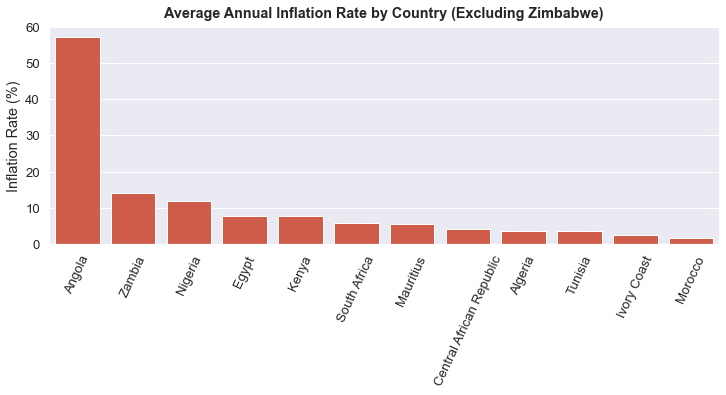

In [6]:
df1 = df.groupby('country', as_index=False)['inflation_annual_cpi'].mean().sort_values('inflation_annual_cpi',ascending = False)
df1.reset_index(drop=True)

plt.figure(figsize=(12,4))
sns.barplot(x="country", y="inflation_annual_cpi", data=df1, order=['Angola', 'Zambia', 'Nigeria', 'Egypt', 'Kenya', 'South Africa', 'Mauritius', 'Central African Republic', 'Algeria', 'Tunisia', 'Ivory Coast', 'Morocco'], color=[0.9,0.3,0.2])
sns.despine()
plt.ylabel('Inflation Rate (%)')
plt.xlabel('')
plt.title('Average Annual Inflation Rate by Country (Excluding Zimbabwe)', y=1.0, fontsize='medium', va='bottom', fontweight='bold')
plt.xticks(rotation=65)

##### Fig. 9: Average inflation rates from 2000 to 2014 for all countries in the dataset (except Zimbabwe). Out of these countries, Angola had the highest average inflation rate by far at nearly 60%. 

### **Research Question 4:** Which country had the weakest currency between 2000 and 2014? 

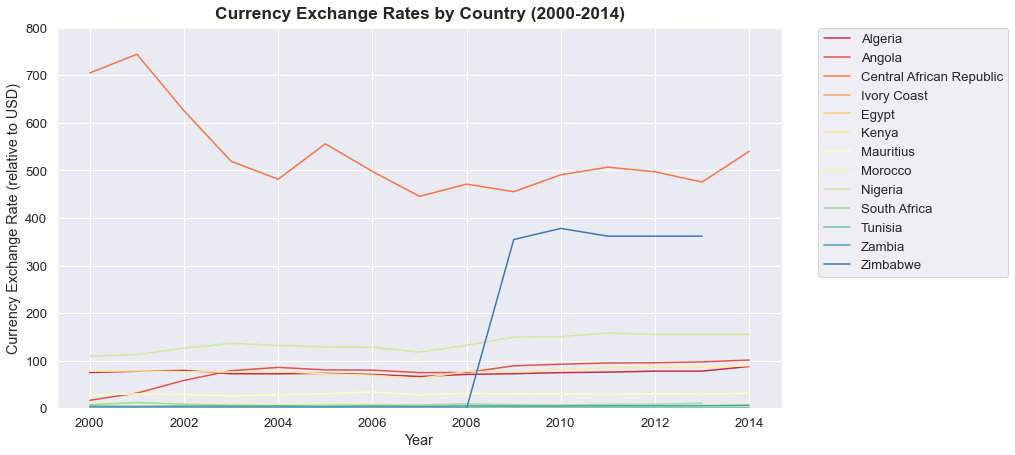

In [8]:
plt.figure(figsize=(13,7))
sns.lineplot(data=df, x='year', y='exch_usd', hue='country', palette='Spectral')
plt.ylabel('Currency Exchange Rate (relative to USD)')
plt.ylim(0, 800)
plt.xlabel('Year')
plt.title('Currency Exchange Rates by Country (2000-2014)', fontsize='large', va='bottom', fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Fig. 10: The Central African Republic had the highest currency exchange rate relative to the US Dollar. Therefore, its currency (the CFA Franc) was the weakest currency between 2000 and 2014. Since there is a wide variation in exchange rates, I created bar plot to more easily visualize the exchange rate for each country's currency during this period:   

Text(0.5, 1.0, 'Average Exchange Rate by Country (2000-2014)')

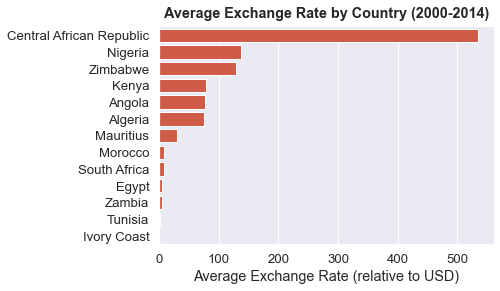

In [7]:
df2 =  df.groupby('country', as_index=False)['exch_usd'].mean().sort_values('exch_usd',ascending = False)
df2.reset_index(drop=True)

sns.barplot(x="exch_usd", y="country", data=df2, color=[0.9, 0.3, 0.2])
sns.despine()
plt.ylabel('')
plt.xlabel('Average Exchange Rate (relative to USD)')
plt.title('Average Exchange Rate by Country (2000-2014)', fontsize='medium', va='bottom', fontweight='bold')

##### Fig. 11: The Central African Republic's average currency exchange rate is significantly higher than that of the other countries. As such, the Central African Republic had the weakest currency between 2000 and 2014. 

Text(0.5, 1.0, 'Violin Plot of Top 3 Countries by Exchange Rate')

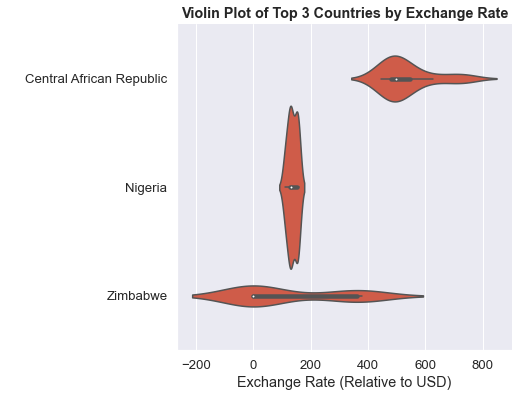

In [137]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.violinplot(data=df, y='country', x='exch_usd', 
               order=['Central African Republic', 'Nigeria', 'Zimbabwe'], 
               gridsize = 100, width = 1.5, color=[0.9, 0.3, 0.2])
sns.despine()
plt.xlabel('Exchange Rate (Relative to USD)', fontsize='medium')
plt.ylabel(' ')
plt.title('Violin Plot of Top 3 Countries by Exchange Rate', fontsize='medium', fontweight='bold')

##### Fig. 12: A violin plot showing the distribution of exchange rate data for the 3 countries with the highest exchange rates. Nigeria has a relatively narrow distribution, indicating that its currency is fairly stable. Zimbabwe's wide distribution is likely the result of its tumultuous economic management. Finally, the Central African Republic has a fairly wide distribution. Interestingly, the Central African Republic's currency, the CFA Franc, is pegged to the Euro. In the future it is therefore unlikely that its exchange rate will fluctuate as much as it has in the past.